In [150]:
%matplotlib inline
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.cm as cm
import datetime

plt.rcParams['figure.figsize'] = [16, 10]
plt.rcParams.update({'font.size': 18})


In [236]:
column_names = ['timeA','VA']
dataA = pd.read_csv('A/CH3.CSV', skiprows=1, names=column_names)
column_names = ['timeAgen','VAgen']
dataAgen = pd.read_csv('A/CH1.CSV', skiprows=1, names=column_names)

column_names = ['timeB','VB']
dataB = pd.read_csv('B/CH3.CSV', skiprows=1, names=column_names)
column_names = ['timeBgen','VBgen']
dataBgen = pd.read_csv('B/CH1.CSV', skiprows=1, names=column_names)

column_names = ['timeC','VC']
dataC = pd.read_csv('C/CH3.CSV', skiprows=1, names=column_names)
column_names = ['timeCgen','VCgen']
dataCgen = pd.read_csv('C/CH1.CSV', skiprows=1, names=column_names)

column_names = ['timeD','VD']
dataD = pd.read_csv('D/CH3.CSV', skiprows=1, names=column_names)
column_names = ['timeDgen','VDgen']
dataDgen = pd.read_csv('D/CH1.CSV', skiprows=1, names=column_names)

frames=[dataA,dataAgen,dataB,dataBgen,dataC,dataCgen,dataD,dataDgen]
alldata=pd.concat(frames,axis=1)
#alldata
alldata.timeA*=1E6
alldata.timeB*=1E6
alldata.timeC*=1E6
alldata.timeD*=1E6
alldata.timeD=alldata.timeD-0.14
alldata.timeAgen*=1E6
alldata.timeBgen*=1E6
alldata.timeCgen*=1E6
alldata.timeDgen*=1E6
alldata.timeDgen=alldata.timeDgen-0.14
alldata

,timeA,VA,timeAgen,VAgen,timeB,VB,timeBgen,VBgen,timeC,VC,timeCgen,VCgen,timeD,VD,timeDgen,VDgen
0,-3.8856,-10.030,-3.8856,0.009766,-3.8856,-10.030,-3.8856,-0.068360,-3.8856,-9.985,-3.8856,0.009766,-3.8600,-9.888,-3.8600,0.009766
1,-3.8848,-10.280,-3.8848,0.029300,-3.8848,-10.080,-3.8848,-0.048830,-3.8848,-10.030,-3.8848,0.029300,-3.8592,-10.180,-3.8592,0.068360
2,-3.8840,-10.130,-3.8840,0.029300,-3.8840,-10.130,-3.8840,0.048830,-3.8840,-10.080,-3.8840,-0.009766,-3.8584,-10.080,-3.8584,0.068360
3,-3.8832,-10.080,-3.8832,0.068360,-3.8832,-10.080,-3.8832,0.048830,-3.8832,-10.130,-3.8832,0.009766,-3.8576,-10.230,-3.8576,0.048830
4,-3.8824,-10.030,-3.8824,-0.009766,-3.8824,-10.180,-3.8824,-0.009766,-3.8824,-10.080,-3.8824,0.009766,-3.8568,-10.030,-3.8568,0.048830
5,-3.8816,-10.080,-3.8816,0.048830,-3.8816,-9.888,-3.8816,-0.009766,-3.8816,-9.839,-3.8816,0.068360,-3.8560,-10.130,-3.8560,-0.009766
6,-3.8808,-10.080,-3.8808,0.009766,-3.8808,-10.030,-3.8808,-0.009766,-3.8808,-9.937,-3.8808,0.009766,-3.8552,-10.130,-3.8552,-0.009766
7,-3.8800,-9.888,-3.8800,-0.009766,-3.8800,-10.030,-3.8800,-0.048830,-3.8800,-9.985,-3.8800,0.048830,-3.8544,-10.130,-3.8544,0.009766
8,-3.8792,-10.130,-3.8792,0.068360,-3.8792,-10.230,-3.8792,-0.009766,-3.8792,-9.937,-3.8792,0.048830,-3.8536,-10.030,-3.8536,0.068360
9,-3.8784,-10.030,-3.8784,0.048830,-3.8784,-10.180,-3.8784,0.009766,-3.8784,-10.130,-3.8784,0.029300,-3.8528,-10.130,-3.8528,-0.009766


In [237]:
now = datetime.datetime.now()
datetimeforplots=now.strftime("%Y%m%d_%H%M")
print(datetimeforplots)

20180327_1630


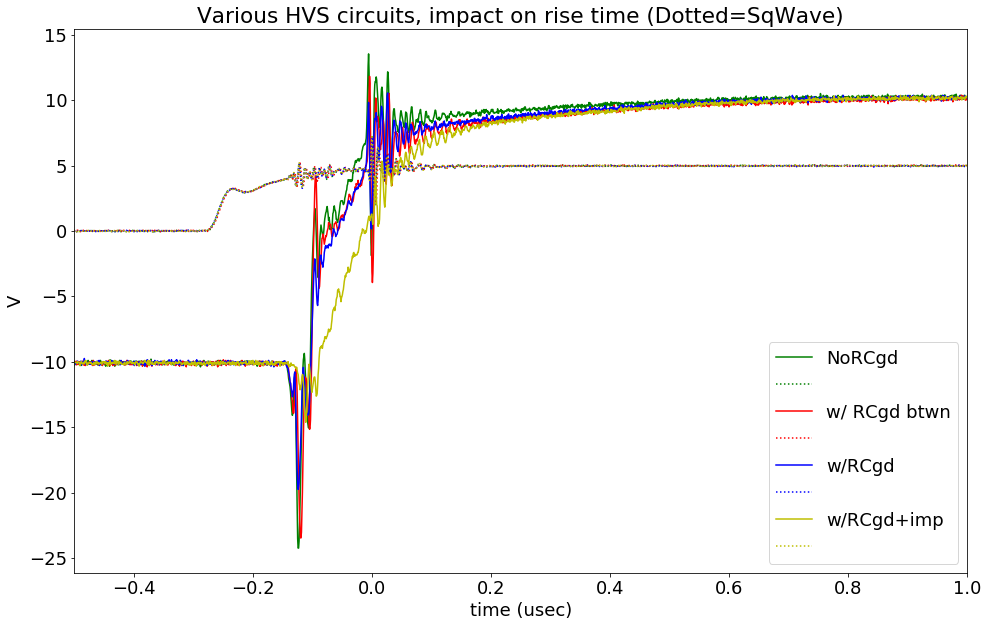

In [240]:
#alldata.plot([],title='Various HVS circuits, impact on rise time')
ax=alldata.plot('timeA','VA',title='Various HVS circuits, impact on rise time (Dotted=SqWave)',label='NoRCgd',c='g')
alldata.plot('timeAgen','VAgen',label='',ax=ax,c='g',ls=':')
alldata.plot('timeD','VD',label='w/ RCgd btwn',ax=ax,c='r')
alldata.plot('timeDgen','VDgen',label='',ax=ax,c='r',ls=':')
alldata.plot('timeB','VB',label='w/RCgd',ax=ax,c='b')
alldata.plot('timeBgen','VBgen',label='',ax=ax,c='b',ls=':')
alldata.plot('timeC','VC',label='w/RCgd+imp',ax=ax,c='y')
alldata.plot('timeCgen','VCgen',label='',ax=ax,c='y',ls=':')
#alldata.plot('timeD','VC',label='w/ RCgd + imp',ax=ax)


#alldata.plot('timeD','VGEN',label='Generation',ax=ax,color='y')


#plt.legend([ "No RCgd", "w/ RCgd","w/ RCgd + imp","w/ RC btwn"])
plt.xlim([-.5,1])
plt.xlabel("time (usec)")
plt.ylabel('V')
#plt.axhline(y=0,ls=':',color='k')
#plt.axhline(y=-10,ls=':',color='k')
#plt.axhline(y=10,ls=':',color='k')
#plt.savefig('Compare_'+datetimeforplots+'.pdf')
plt.show()
